In [1]:
import bioreactor

In [14]:
from bioreactor import utils
from bioreactor import clustering
from bioreactor import plotting
from bioreactor.graphs import dense_clustering, clustering_select_best_tr

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import igraph as ig
# import leidenalg as la

# Data

In [5]:
data = utils.read_dataset('/uftp/users/ashchetsova/hackathon/ID_vs_population_n_cells.tsv')
#change pathways

In [44]:
data

,CD8+ None maturity and None expression,CD4+ None maturity and None expression,Treg None maturity and TIGIT+ expression,Treg TE maturity and None expression,Treg None maturity and PD-1+ expression,Treg NV maturity and None expression,Treg None maturity and HLA-DR+ expression,Treg EMTM maturity and None expression,Treg CM maturity and None expression,Treg None maturity and CD39+ expression,...,Th1 EM maturity and None expression,Th22 CM maturity and None expression,Th2 CM maturity and None expression,Th17.1 CM maturity and None expression,Th17 CM maturity and None expression,Th1 CM maturity and None expression,CD8+ TM maturity and None expression,CD8+ EM maturity and None expression,CD4+ TM maturity and None expression,CD4+ EM maturity and None expression
48_90,1130.365604,24.270056,10.801799,2.085030,6.914228,0.860915,8.945450,8.192149,0.497717,4.728309,...,18.385162,0.776838,3.251210,0.067134,5.169328,0.421986,27.933896,85.753762,76.552093,34.660394
53_90,193.878967,14.500000,6.356643,0.520979,5.167832,0.391608,5.118881,4.762238,0.664336,5.846154,...,1.618463,0.024976,1.543534,0.109896,0.934113,0.299715,9.557289,45.924159,37.449427,3.421750
52_90,2109.358116,17.717625,12.230999,3.064107,9.179607,0.203426,12.561567,10.565448,0.279711,10.946872,...,5.404945,0.078560,2.348952,0.255321,4.631127,0.604914,60.688628,180.627439,118.036779,22.177559
60_90,7.301615,30.338803,1.433156,0.286631,1.021903,0.274169,1.296072,0.672960,0.336480,1.607628,...,0.000000,1.090566,9.751877,0.047416,2.070496,0.363522,1.388824,0.992017,5.310585,0.000000
1_90,18.330939,95.704117,8.882517,1.211702,6.290959,2.423404,9.530407,7.210863,1.671654,8.462131,...,0.012862,0.315131,2.611084,0.398737,4.643356,1.099742,3.141563,0.458880,43.674553,0.122194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26_90,38.501330,0.003897,0.030414,0.000000,0.040316,0.000000,0.016975,0.045268,0.000707,0.028292,...,0.018648,0.000000,0.000622,0.000000,0.000000,0.000000,0.433946,11.479065,0.293397,0.051593
17_90,14.326548,106.589712,5.480660,3.773865,1.828388,2.044552,1.760837,1.891436,0.310736,3.760354,...,0.049962,0.389701,4.416611,2.198313,9.832456,1.838589,8.039993,0.759225,46.324458,0.319755
23_90,9.955613,65.157043,14.206579,5.224222,3.031976,0.492137,7.898280,10.114616,0.430190,11.673623,...,0.000000,0.088470,1.229740,0.079623,2.915102,0.128282,3.641282,0.813145,55.470987,0.008847
55_90,410.365066,66.188750,27.726062,3.270320,18.351578,3.029281,26.618583,20.384128,4.332197,12.709950,...,3.759644,0.200720,1.860522,0.424600,9.711770,3.906324,43.975123,102.433348,89.613850,17.902698


In [6]:
day90 = utils.read_dataset('/uftp/users/ashchetsova/hackathon/data_90_day.tsv')

In [7]:
data = data.loc[day90.index]

In [16]:
data.head()

,CD8+ None maturity and None expression,CD4+ None maturity and None expression,Treg None maturity and TIGIT+ expression,Treg TE maturity and None expression,Treg None maturity and PD-1+ expression,Treg NV maturity and None expression,Treg None maturity and HLA-DR+ expression,Treg EMTM maturity and None expression,Treg CM maturity and None expression,Treg None maturity and CD39+ expression,...,Th1 EM maturity and None expression,Th22 CM maturity and None expression,Th2 CM maturity and None expression,Th17.1 CM maturity and None expression,Th17 CM maturity and None expression,Th1 CM maturity and None expression,CD8+ TM maturity and None expression,CD8+ EM maturity and None expression,CD4+ TM maturity and None expression,CD4+ EM maturity and None expression
48_90,1130.365604,24.270056,10.801799,2.085030,6.914228,0.860915,8.945450,8.192149,0.497717,4.728309,...,18.385162,0.776838,3.251210,0.067134,5.169328,0.421986,27.933896,85.753762,76.552093,34.660394
53_90,193.878967,14.500000,6.356643,0.520979,5.167832,0.391608,5.118881,4.762238,0.664336,5.846154,...,1.618463,0.024976,1.543534,0.109896,0.934113,0.299715,9.557289,45.924159,37.449427,3.421750
52_90,2109.358116,17.717625,12.230999,3.064107,9.179607,0.203426,12.561567,10.565448,0.279711,10.946872,...,5.404945,0.078560,2.348952,0.255321,4.631127,0.604914,60.688628,180.627439,118.036779,22.177559
60_90,7.301615,30.338803,1.433156,0.286631,1.021903,0.274169,1.296072,0.672960,0.336480,1.607628,...,0.000000,1.090566,9.751877,0.047416,2.070496,0.363522,1.388824,0.992017,5.310585,0.000000
1_90,18.330939,95.704117,8.882517,1.211702,6.290959,2.423404,9.530407,7.210863,1.671654,8.462131,...,0.012862,0.315131,2.611084,0.398737,4.643356,1.099742,3.141563,0.458880,43.674553,0.122194


In [18]:
day90['status_new'] = day90.GVHD_status.apply(lambda x: 'cGVHD_neg' if x == False else 'cGVHD_pos')

In [92]:
day90.GVHD_day

,CD8+ None maturity and None expression,CD4+ None maturity and None expression,Treg None maturity and TIGIT+ expression,Treg TE maturity and None expression,Treg None maturity and PD-1+ expression,Treg NV maturity and None expression,Treg None maturity and HLA-DR+ expression,Treg EMTM maturity and None expression,Treg CM maturity and None expression,Treg None maturity and CD39+ expression,...,Th1 CM maturity and None expression,CD8+ TM maturity and None expression,CD8+ EM maturity and None expression,CD4+ TM maturity and None expression,CD4+ EM maturity and None expression,patient,day,GVHD_status,GVHD_day,status_new
48_90,1130.365604,24.270056,10.801799,2.085030,6.914228,0.860915,8.945450,8.192149,0.497717,4.728309,...,0.421986,27.933896,85.753762,76.552093,34.660394,48,90,False,0.0,cGVHD_neg
53_90,193.878967,14.500000,6.356643,0.520979,5.167832,0.391608,5.118881,4.762238,0.664336,5.846154,...,0.299715,9.557289,45.924159,37.449427,3.421750,53,90,False,0.0,cGVHD_neg
52_90,2109.358116,17.717625,12.230999,3.064107,9.179607,0.203426,12.561567,10.565448,0.279711,10.946872,...,0.604914,60.688628,180.627439,118.036779,22.177559,52,90,False,0.0,cGVHD_neg
60_90,7.301615,30.338803,1.433156,0.286631,1.021903,0.274169,1.296072,0.672960,0.336480,1.607628,...,0.363522,1.388824,0.992017,5.310585,0.000000,60,90,True,168.0,cGVHD_pos
1_90,18.330939,95.704117,8.882517,1.211702,6.290959,2.423404,9.530407,7.210863,1.671654,8.462131,...,1.099742,3.141563,0.458880,43.674553,0.122194,1,90,False,0.0,cGVHD_neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26_90,38.501330,0.003897,0.030414,0.000000,0.040316,0.000000,0.016975,0.045268,0.000707,0.028292,...,0.000000,0.433946,11.479065,0.293397,0.051593,26,90,False,0.0,cGVHD_neg
17_90,14.326548,106.589712,5.480660,3.773865,1.828388,2.044552,1.760837,1.891436,0.310736,3.760354,...,1.838589,8.039993,0.759225,46.324458,0.319755,17,90,True,172.0,cGVHD_pos
23_90,9.955613,65.157043,14.206579,5.224222,3.031976,0.492137,7.898280,10.114616,0.430190,11.673623,...,0.128282,3.641282,0.813145,55.470987,0.008847,23,90,False,0.0,cGVHD_neg
55_90,410.365066,66.188750,27.726062,3.270320,18.351578,3.029281,26.618583,20.384128,4.332197,12.709950,...,3.906324,43.975123,102.433348,89.613850,17.902698,55,90,False,0.0,cGVHD_neg


In [46]:
remove_features = ['Th22 EM maturity and None expression',
 'Th17.1 NV maturity and None expression',
 'Th22 CM maturity and None expression',
 'Th17 TE maturity and None expression',
 'Th1 EM maturity and None expression',
 'Th17.1 CM maturity and None expression',
 'CD8+ EMTM maturity and PD-1-TIGIT- expression',
 'Th17.1 TE maturity and None expression',
 'CD8+ EMTM maturity and PD-1-TIGIT+ expression',
 'Treg_Th1 None maturity and None expression',
 'CD8+ EMTM maturity and PD1+ expression',
 'Treg_Th17.1 None maturity and None expression',
 'Th17 EM maturity and None expression',
 'CD8+ EM maturity and None expression',
 'Treg None maturity and CD226+TIGIT- expression',
 'Th22 TE maturity and None expression',
 'Th17.1 EM maturity and None expression',
 'CD8+ EMTM maturity and CD39+ expression',
 'Th22 NV maturity and None expression',
 'Th17 NV maturity and None expression',
 'CD4+ EM maturity and None expression',
 'CD8+ EMTM maturity and PD-1+TIGIT+ expression',
 'Th2 TE maturity and None expression', 
 'Th2 EM maturity and None expression'
]

In [47]:
rem_pat = '26_90'

In [50]:
features_ok = set(data.columns).difference(set(remove_features))
len(features_ok)

130

In [51]:
data = data[features_ok]

/tmp/ipykernel_1854159/1494843374.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = data[features_ok]


In [57]:
data = data.loc[data.index != rem_pat]

In [58]:
data_scaled = utils.median_scale(data, clip=5)

  0%|          | 0/10 [00:00<?, ?it/s]

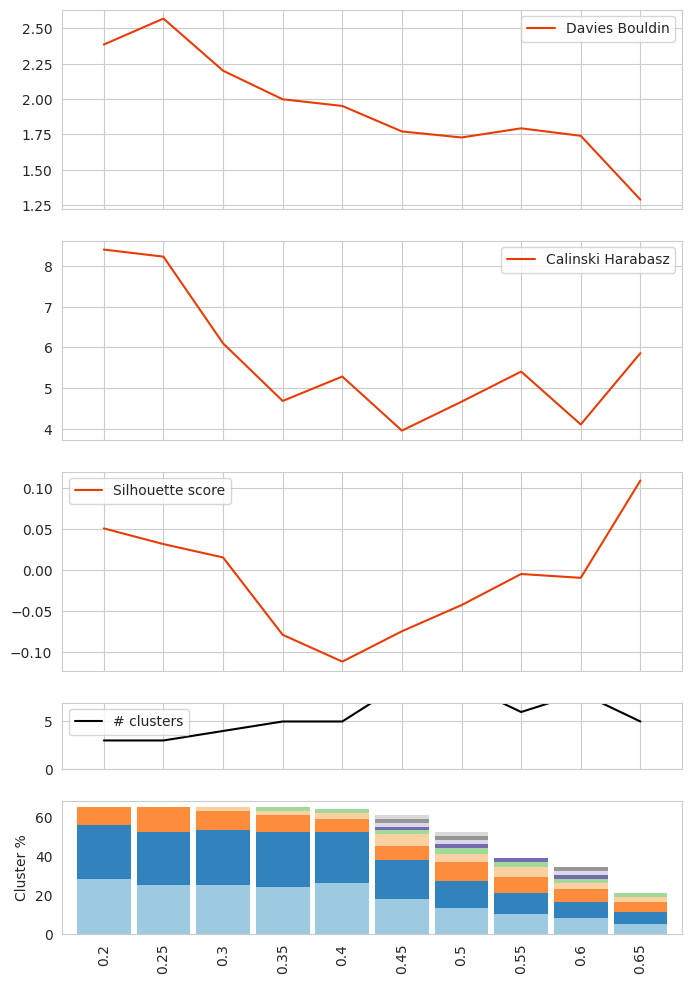

/home/enesterenko/venvs/bior_38/lib/python3.8/site-packages/bioreactor/graphs.py:307: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_scs_filtered.sc += 1 - cl_scs_filtered.sc.min()


'0.2'

In [59]:
cluster_variants = clustering_select_best_tr(data_scaled.dropna(axis=1), 
                                             threshold_mm=(.2, .7), 
    step=.05, method='leiden', 
    n_clusters=3)
cluster_variants

In [60]:
clust = dense_clustering(data_scaled, threshold=.2, method='leiden')

In [87]:
clust.unique()

array([2, 3, 1])

In [88]:
clust.value_counts()

2    28
1    28
3     9
Name: Subtypes, dtype: int64

In [62]:
# day90.rename(columns ={'status_new':'cGHVD status'})

<AxesSubplot:>

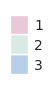

In [89]:
clust_colors = {1:'#e8c8d9', 2:'#dbe9e5', 3:'#b7d0e8'}
plotting.patch_plot(clust_colors)

<AxesSubplot:>

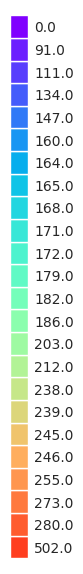

In [95]:
day_colors = plotting.lin_colors(day90.GVHD_day)
plotting.patch_plot(day_colors)

In [94]:
day90

,CD8+ None maturity and None expression,CD4+ None maturity and None expression,Treg None maturity and TIGIT+ expression,Treg TE maturity and None expression,Treg None maturity and PD-1+ expression,Treg NV maturity and None expression,Treg None maturity and HLA-DR+ expression,Treg EMTM maturity and None expression,Treg CM maturity and None expression,Treg None maturity and CD39+ expression,...,Th1 CM maturity and None expression,CD8+ TM maturity and None expression,CD8+ EM maturity and None expression,CD4+ TM maturity and None expression,CD4+ EM maturity and None expression,patient,day,GVHD_status,GVHD_day,status_new
48_90,1130.365604,24.270056,10.801799,2.085030,6.914228,0.860915,8.945450,8.192149,0.497717,4.728309,...,0.421986,27.933896,85.753762,76.552093,34.660394,48,90,False,0.0,cGVHD_neg
53_90,193.878967,14.500000,6.356643,0.520979,5.167832,0.391608,5.118881,4.762238,0.664336,5.846154,...,0.299715,9.557289,45.924159,37.449427,3.421750,53,90,False,0.0,cGVHD_neg
52_90,2109.358116,17.717625,12.230999,3.064107,9.179607,0.203426,12.561567,10.565448,0.279711,10.946872,...,0.604914,60.688628,180.627439,118.036779,22.177559,52,90,False,0.0,cGVHD_neg
60_90,7.301615,30.338803,1.433156,0.286631,1.021903,0.274169,1.296072,0.672960,0.336480,1.607628,...,0.363522,1.388824,0.992017,5.310585,0.000000,60,90,True,168.0,cGVHD_pos
1_90,18.330939,95.704117,8.882517,1.211702,6.290959,2.423404,9.530407,7.210863,1.671654,8.462131,...,1.099742,3.141563,0.458880,43.674553,0.122194,1,90,False,0.0,cGVHD_neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26_90,38.501330,0.003897,0.030414,0.000000,0.040316,0.000000,0.016975,0.045268,0.000707,0.028292,...,0.000000,0.433946,11.479065,0.293397,0.051593,26,90,False,0.0,cGVHD_neg
17_90,14.326548,106.589712,5.480660,3.773865,1.828388,2.044552,1.760837,1.891436,0.310736,3.760354,...,1.838589,8.039993,0.759225,46.324458,0.319755,17,90,True,172.0,cGVHD_pos
23_90,9.955613,65.157043,14.206579,5.224222,3.031976,0.492137,7.898280,10.114616,0.430190,11.673623,...,0.128282,3.641282,0.813145,55.470987,0.008847,23,90,False,0.0,cGVHD_neg
55_90,410.365066,66.188750,27.726062,3.270320,18.351578,3.029281,26.618583,20.384128,4.332197,12.709950,...,3.906324,43.975123,102.433348,89.613850,17.902698,55,90,False,0.0,cGVHD_neg


In [64]:
day90.status_new.unique()

array(['cGVHD_neg', 'cGVHD_pos'], dtype=object)

<AxesSubplot:>

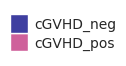

In [65]:
resp_pal = {'cGVHD_neg':'#3f3fa0', 'cGVHD_pos':'#cf619b'}
# plotting.lin_colors(day90.status_new)
plotting.patch_plot(resp_pal)

In [66]:
clust.name = 'Subtypes'

<AxesSubplot:>

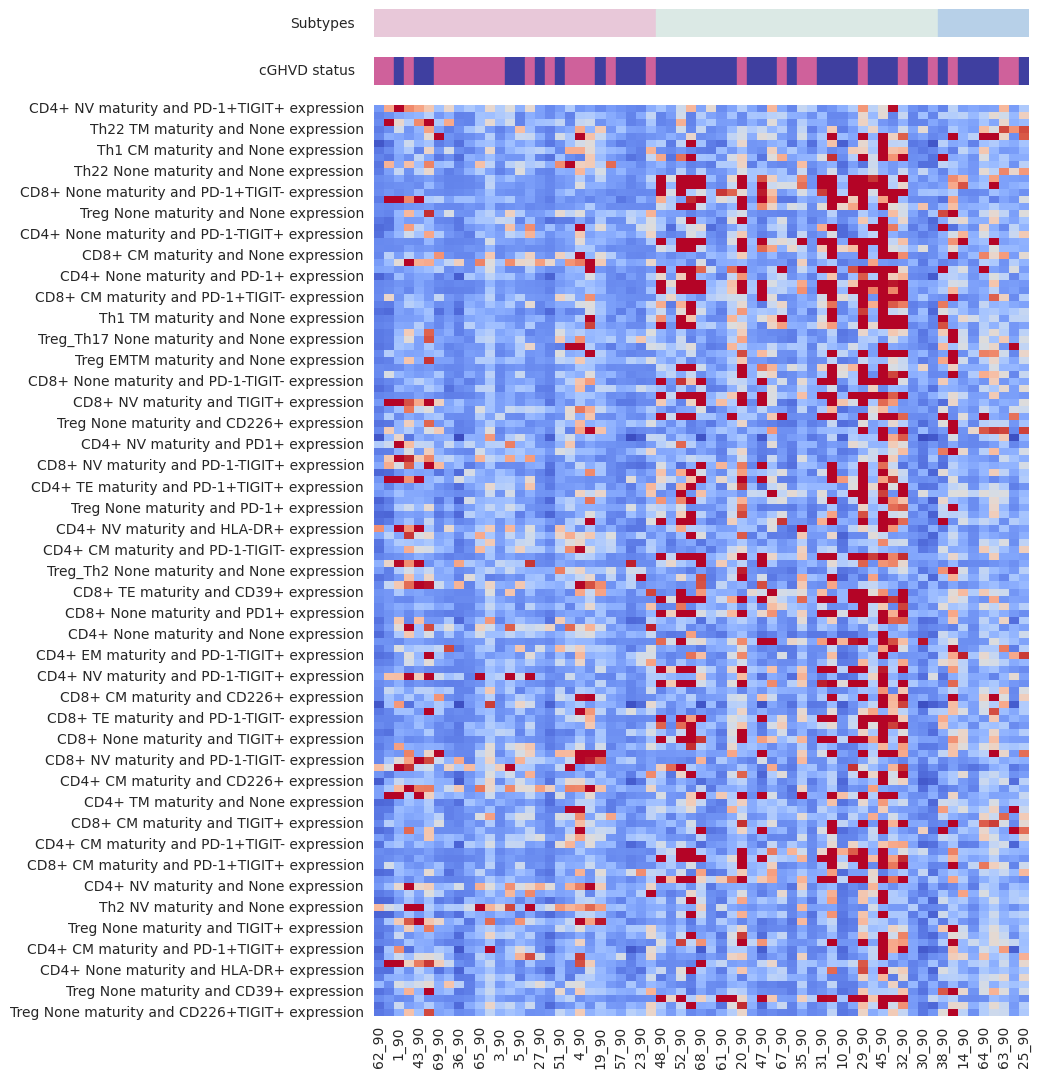

In [91]:
af = plotting.axis_matras([0.3, 0.3, 10])

so = plotting.sort_by_terms_order(clust, t_order=[1, 2, 3, 4])
plotting.line_palette_annotation_plot(clust.loc[so], palette=clust_colors, ax=next(af))
plotting.line_palette_annotation_plot(day90.rename(columns ={'status_new':'cGHVD status'})['cGHVD status'].loc[so], palette=resp_pal, ax=next(af))

plt.tight_layout()

sns.heatmap(data_scaled.dropna(axis=1).loc[so].T, ax=next(af),  cmap='coolwarm', cbar=False)

<AxesSubplot:>

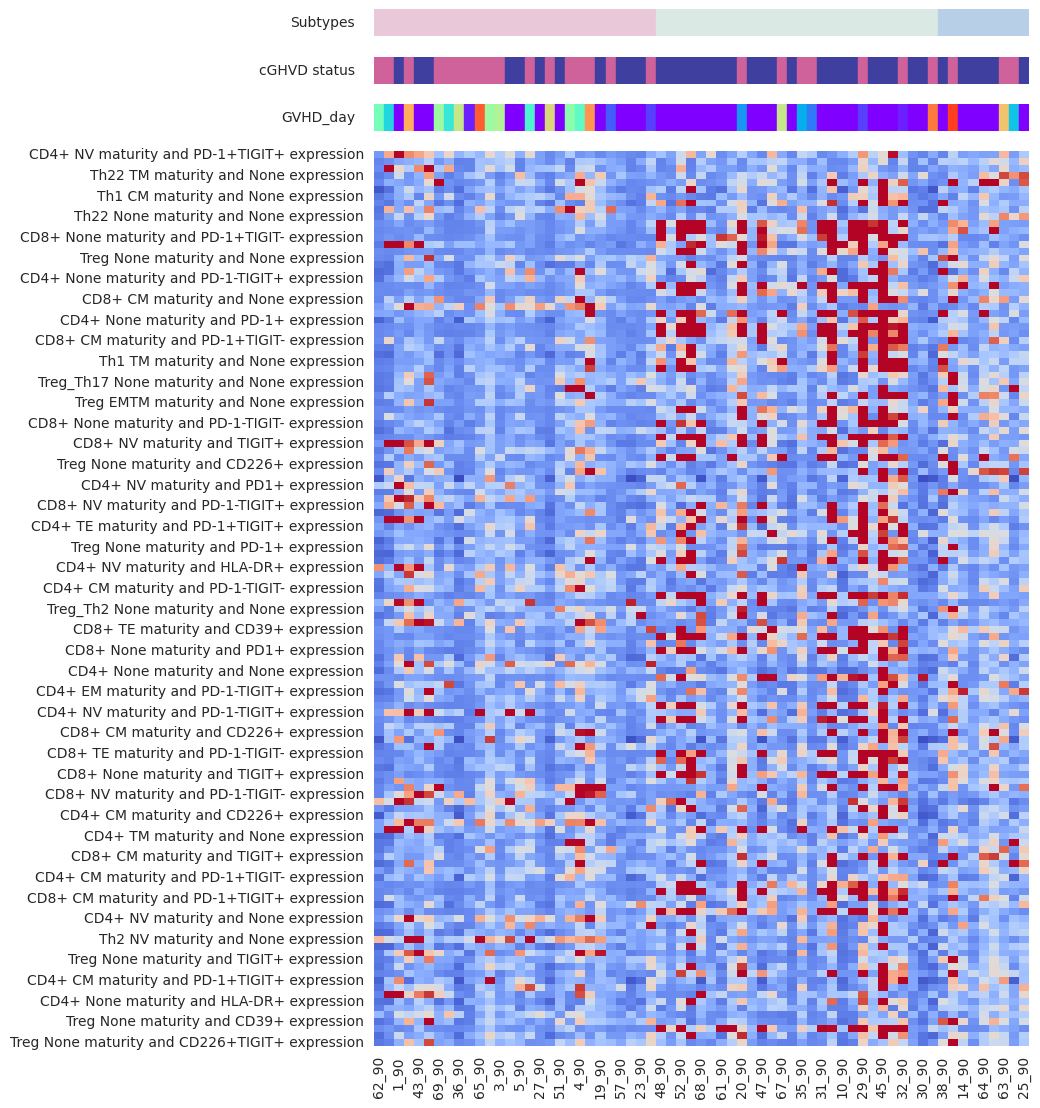

In [96]:
af = plotting.axis_matras([0.3, 0.3, 0.3, 10])

so = plotting.sort_by_terms_order(clust, t_order=[1, 2, 3, 4])
plotting.line_palette_annotation_plot(clust.loc[so], palette=clust_colors, ax=next(af))
plotting.line_palette_annotation_plot(day90.rename(columns ={'status_new':'cGHVD status'})['cGHVD status'].loc[so], palette=resp_pal, ax=next(af))
plotting.line_palette_annotation_plot(day90.GVHD_day.loc[so], palette=day_colors, ax=next(af))

plt.tight_layout()

sns.heatmap(data_scaled.dropna(axis=1).loc[so].T, ax=next(af),  cmap='coolwarm', cbar=False)

In [ ]:
#on selected features

In [84]:
ls = set(['CD4+ NV maturity and TIGIT+ expression',
 'CD4+ NV maturity and PD-1-TIGIT+ expression',
 'CD4+ NV maturity and PD-1-TIGIT- expression',
 'CD4+ NV maturity and PD-1+TIGIT+ expression',
 'CD4+ NV maturity and PD-1+TIGIT- expression',
 'CD4+ NV maturity and PD1+ expression',
 'CD4+ NV maturity and HLA-DR+ expression',
 'CD4+ NV maturity and CD39+ expression',
 'CD4+ NV maturity and CD226+ expression',
 'CD4+ NV maturity and None expression',
 'CD4+ CM maturity and TIGIT+ expression',
 'CD4+ CM maturity and PD-1-TIGIT+ expression',
 'CD4+ CM maturity and PD-1-TIGIT- expression',
 'CD4+ CM maturity and PD-1+TIGIT+ expression',
 'CD4+ CM maturity and PD-1+TIGIT- expression',
 'CD4+ CM maturity and PD1+ expression',
 'CD4+ CM maturity and HLA-DR+ expression',
 'CD4+ CM maturity and CD39+ expression',
 'CD4+ CM maturity and CD226+ expression',
 'CD4+ CM maturity and None expression',
 'CD8+ EMTM maturity and TIGIT+ expression',
 'CD8+ EMTM maturity and HLA-DR+ expression',
 'CD8+ EMTM maturity and CD226+ expression',
 'CD8+ EMTM maturity and None expression',
 'CD8+ TE maturity and TIGIT+ expression',
 'CD8+ TE maturity and PD-1-TIGIT+ expression',
 'CD8+ TE maturity and PD-1-TIGIT- expression',
 'CD8+ TE maturity and PD-1+TIGIT+ expression',
 'CD8+ TE maturity and PD-1+TIGIT- expression',
 'CD8+ TE maturity and PD1+ expression',
 'CD8+ TE maturity and HLA-DR+ expression',
 'CD8+ TE maturity and CD39+ expression',
 'CD8+ TE maturity and CD226+ expression',
 'CD8+ TE maturity and None expression',
 'CD4+ EM maturity and TIGIT+ expression',
 'CD4+ EM maturity and PD-1-TIGIT+ expression',
 'CD4+ EM maturity and PD-1-TIGIT- expression',
 'CD4+ EM maturity and PD-1+TIGIT+ expression',
 'CD4+ EM maturity and PD-1+TIGIT- expression',
 'CD4+ EM maturity and PD1+ expression',
 'CD4+ EM maturity and HLA-DR+ expression',
 'CD4+ EM maturity and CD39+ expression',
 'CD4+ EM maturity and CD226+ expression',
 'Treg None maturity and TIGIT+ expression',
 'Treg TE maturity and None expression',
 'Treg None maturity and PD-1+ expression',
 'Treg NV maturity and None expression',
 'Treg None maturity and HLA-DR+ expression',
 'Treg EMTM maturity and None expression',
 'Treg CM maturity and None expression',
 'Treg None maturity and CD39+ expression',
 'Treg None maturity and CD226-TIGIT+ expression',
 'Treg None maturity and CD226-TIGIT- expression',
 'Treg None maturity and CD226+TIGIT+ expression',
 'Treg None maturity and CD226+ expression',
 'Treg_Th22 None maturity and None expression',
 'Treg_Th2 None maturity and None expression',
 'Treg_Th17 None maturity and None expression',
 'Treg None maturity and None expression',
 'Treg None maturity and TIGIT+ expression',
 'Treg TE maturity and None expression',
 'Treg None maturity and PD-1+ expression',
 'Treg NV maturity and None expression',
 'Treg None maturity and HLA-DR+ expression',
 'Treg EMTM maturity and None expression',
 'Treg CM maturity and None expression',
 'Treg None maturity and CD39+ expression',
 'Treg None maturity and CD226-TIGIT+ expression',
 'Treg None maturity and CD226-TIGIT- expression',
 'Treg None maturity and CD226+TIGIT+ expression',
 'Treg None maturity and CD226+ expression',
 'Treg_Th22 None maturity and None expression',
 'Treg_Th2 None maturity and None expression',
 'Treg_Th17 None maturity and None expression',
 'Treg None maturity and None expression'])


/tmp/ipykernel_1854159/104513610.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.heatmap(data_scaled.dropna(axis=1)[ls].loc[so].T, ax=next(af),  cmap='coolwarm', cbar=False)


<AxesSubplot:>

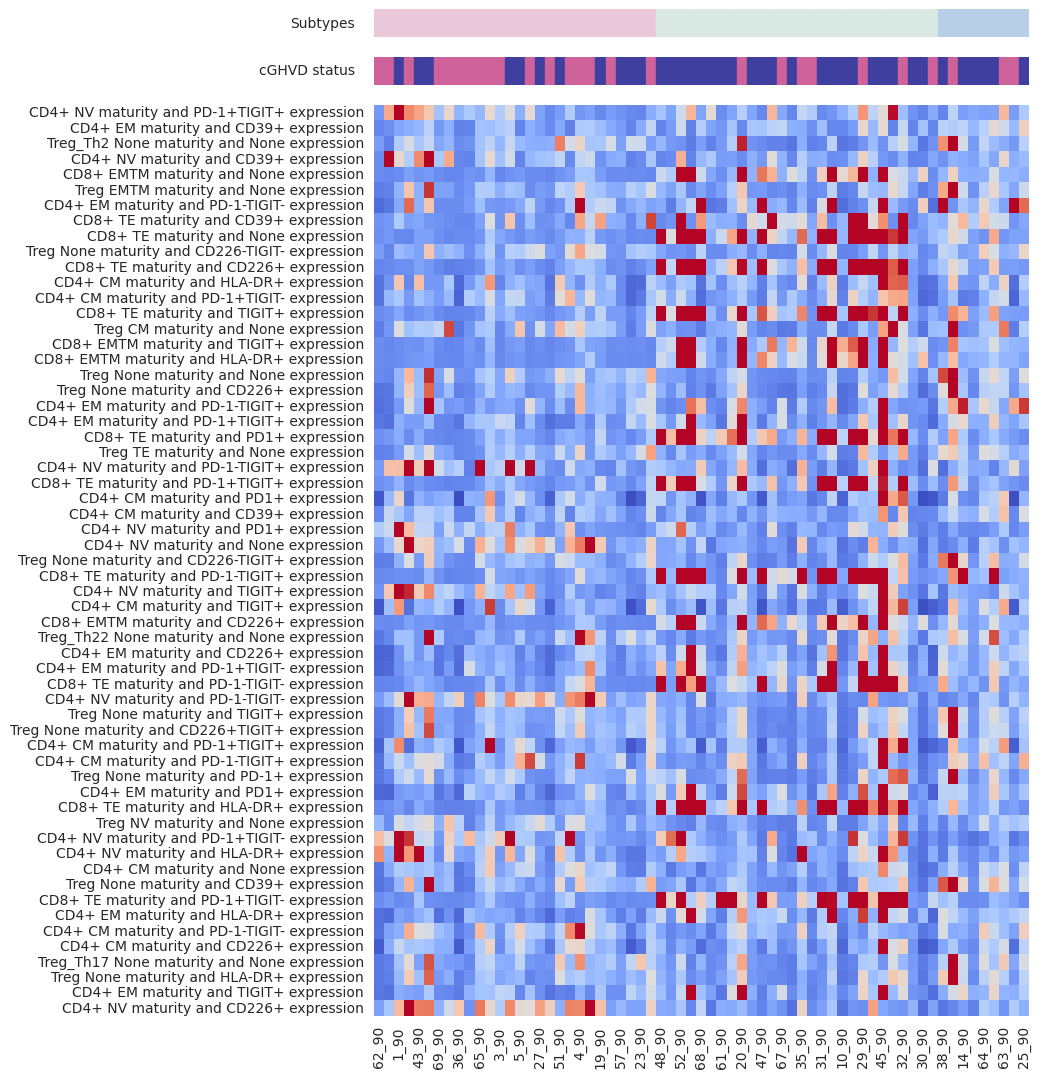

In [90]:
af = plotting.axis_matras([0.3, 0.3, 10])

so = plotting.sort_by_terms_order(clust, t_order=[1, 2, 3])
plotting.line_palette_annotation_plot(clust.loc[so], palette=clust_colors, ax=next(af))
plotting.line_palette_annotation_plot(day90.rename(columns ={'status_new':'cGHVD status'})['cGHVD status'].loc[so], palette=resp_pal, ax=next(af))

plt.tight_layout()

sns.heatmap(data_scaled.dropna(axis=1)[ls].loc[so].T, ax=next(af),  cmap='coolwarm', cbar=False)

/tmp/ipykernel_1854159/448735696.py:10: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.heatmap(data_scaled.dropna(axis=1)[ls].loc[so].T, ax=next(af),  cmap='coolwarm', cbar=False)


<AxesSubplot:>

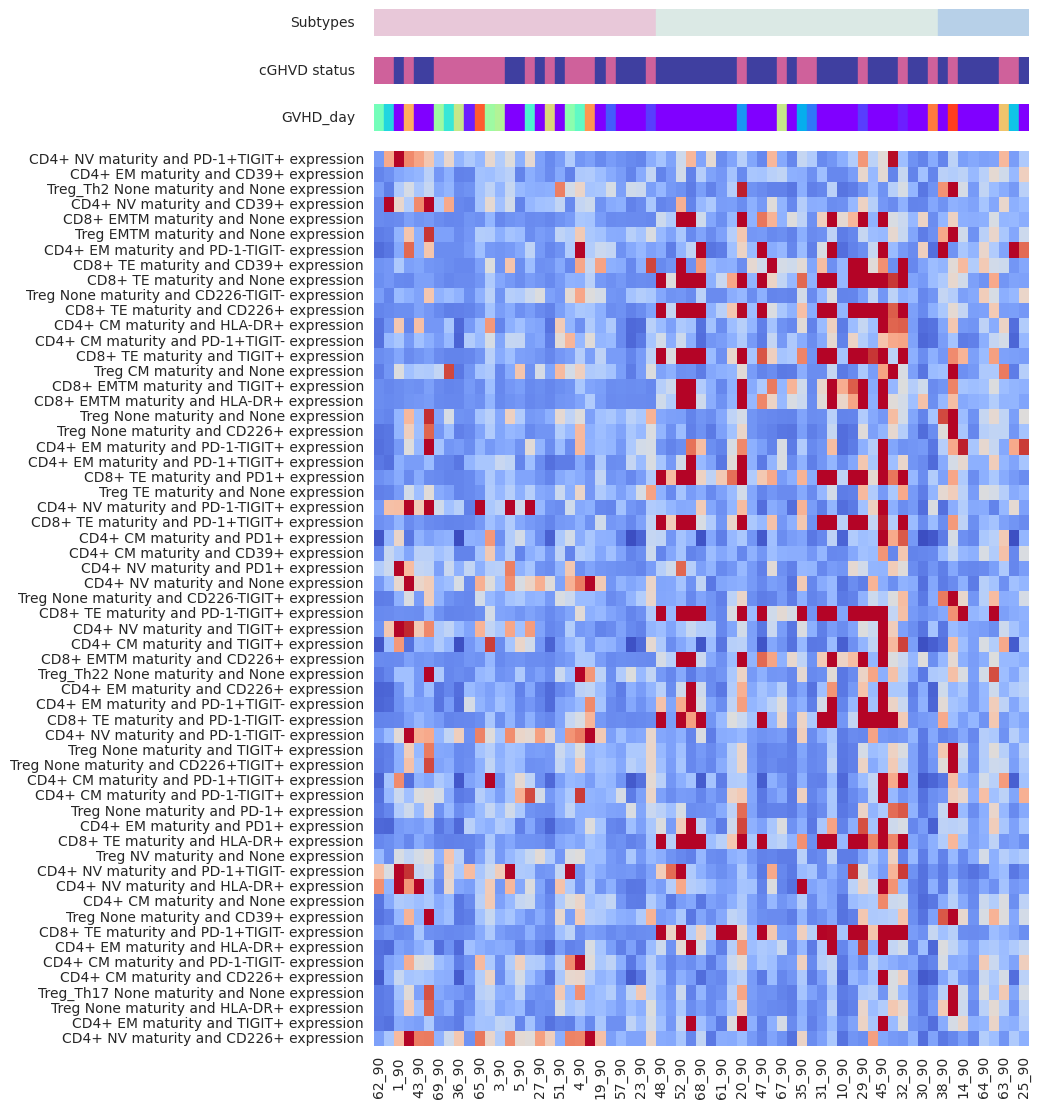

In [97]:
af = plotting.axis_matras([0.3, 0.3, 0.3, 10])

so = plotting.sort_by_terms_order(clust, t_order=[1, 2, 3])
plotting.line_palette_annotation_plot(clust.loc[so], palette=clust_colors, ax=next(af))
plotting.line_palette_annotation_plot(day90.rename(columns ={'status_new':'cGHVD status'})['cGHVD status'].loc[so], palette=resp_pal, ax=next(af))
plotting.line_palette_annotation_plot(day90.GVHD_day.loc[so], palette=day_colors, ax=next(af))

plt.tight_layout()

sns.heatmap(data_scaled.dropna(axis=1)[ls].loc[so].T, ax=next(af),  cmap='coolwarm', cbar=False)